<h1 align="center"> Credit Risk Prediction (Loan Default) </h1>  
<h3 align="center">Predicting loan default likelihood to support smarter lending decisions</h3>  

---

<h2 align="center">📍 Step 1: Introduction & Problem Statement</h2>  

Banks and financial institutions aim to minimize loan defaults and improve lending efficiency.  
By predicting whether a loan applicant is likely to **default**, lenders can take preventive actions — such as **additional verification, adjusting interest rates, or offering tailored financial plans**.

### Problem Statement  
Predict the **Loan_Status** (Approved / Default) using key applicant features such as:
- **Income** (Applicant & Coapplicant)
- **Education**
- **Employment Status**
- **Credit History**
- **Property Area**

### Objective  
Build a **classification model** that identifies potential defaulters and provides **data-driven insights** to help banks:
- Reduce financial risk  
- Improve loan approval decisions  
- Strengthen customer profiling strategies

### Importing Libraries & Loading Dataset

Before we begin data preprocessing and analysis, let's import the essential Python libraries and load the dataset into a pandas DataFrame.



In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv(r"C:\Users\AZAN LAPTOP STORE\Downloads\Portfolio\Projects\Credit Risk Prediction\train_u6lujuX_CVtuZ9i.csv")


<h2 align="center">📍 Step 2: Data Understanding & Description</h2> 

In this step, we’ll explore and describe the dataset to understand its structure, data types, and potential issues before preprocessing.

### Objectives:
- Examine dataset dimensions, column names, and data types.  
- Identify the **target variable** (`Loan_Status`) and ensure it’s correctly mapped.  
- Classify features into **numerical** and **categorical** groups.  
- Check for **missing values**, **duplicates**, and **anomalies**.  
- Summarize how each feature may influence loan approval or default likelihood.


In [3]:
# === Basic Exploration ===
# Dataset shape and info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Preview first few rows
display(df.head())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Summary statistics for numerical columns
print("\n=== Summary Statistics (Numerical) ===")
print(df.describe())

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Check unique values in categorical features
print("\n=== Unique Values in Categorical Columns ===")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Quick target variable distribution (if exists)
if 'Loan_Status' in df.columns:
    print("\nLoan_Status Distribution:")
    print(df['Loan_Status'].value_counts())
else:
    print("\n⚠️ 'Loan_Status' column not found — will create/mapped later if required.")


Dataset Shape: (614, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Missing Values per Column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Duplicate Rows: 0

=== Summary Statistics (Numerical) ===
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         3

### 🔍 Step 2 Insights: Data Understanding & Description

- Dataset has **614 records** and **13 features**; no duplicates found.  
- Missing values mainly in `Credit_History`, `Self_Employed`, and `LoanAmount`.  
- Target variable **Loan_Status** is slightly imbalanced (Y: 422, N: 192).  
- Key numeric features: `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Credit_History`.  
- Most loans have a **360-month term**; majority applicants have good credit.  
- Likely strong predictors: **Credit_History**, **Income**, and **LoanAmount**.

---

<h2 align="center">📍 Step 3: Data Cleaning & Preparation</h2>

- Fill missing values in numeric columns (`LoanAmount`, `Loan_Amount_Term`, `Credit_History`) with **median**.  
- Fill missing values in categorical columns (`Gender`, `Married`, `Dependents`, `Self_Employed`) with **mode**.  
- Encode categorical variables: `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area` using **Label Encoding**.  
- Optional: scale numeric features for models sensitive to feature magnitude.  
- Split dataset into **training and testing sets (80/20)**.  
- Keep a record of all preprocessing steps.



In [5]:
# Numeric columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# Categorical columns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Encode categorical features
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Map target variable (Y=1, N=0)
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

# Split features and target
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick check
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())

X_train shape: (491, 11)
X_test shape: (123, 11)
y_train distribution:
 Series([], Name: count, dtype: int64)


### 📌 Data Cleaning & Preparation Insights

- Missing numerical values filled with **median**, categorical with **mode**.  
- Categorical features encoded for modeling.  
- **Train-test split:** 491 train, 123 test samples.  
- Dataset is clean, complete, and ready for modeling.

---

<h2 align="center">📍 Step 4: Exploratory Data Analysis (EDA)</h2>

Goal: Understand feature distributions, relationships with Loan_Status, and correlations to guide modeling and insights.

### 1. Univariate Analysis
- Examines distribution and spread of numerical features.
- Detects skewness, outliers, or unusual patterns.


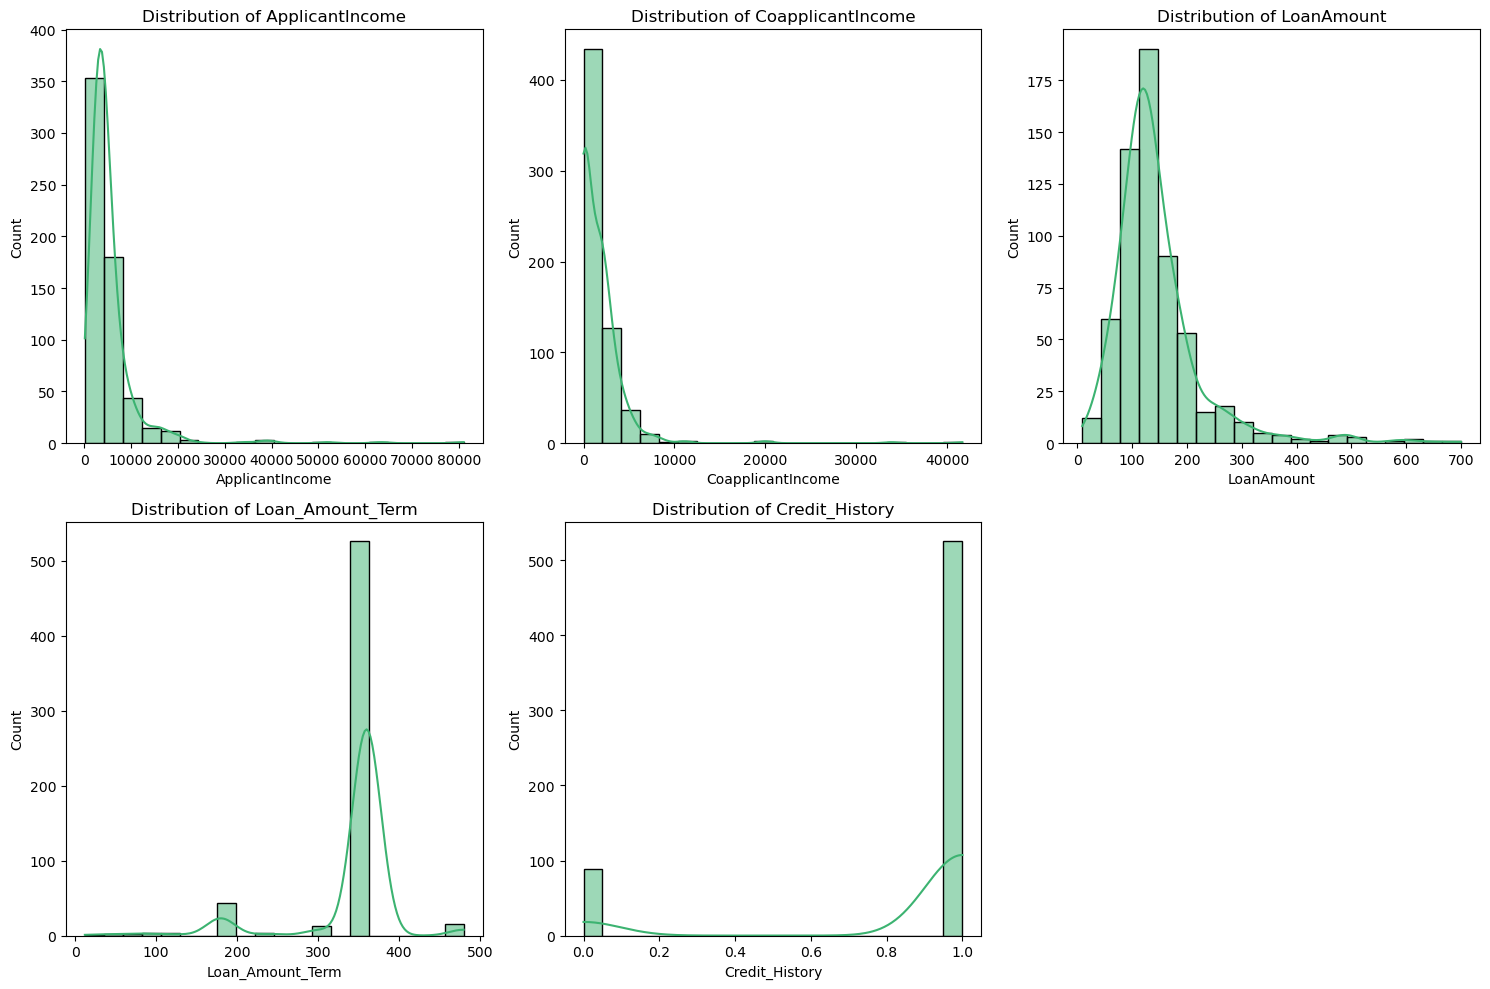

In [6]:
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True, color='mediumseagreen', bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### 🔹 Insights: Univariate Analysis (Numerical Features)
- **ApplicantIncome**: Wide range from 150 to 81,000; most applicants earn below 6,000.  
- **CoapplicantIncome**: Many applicants have zero coapplicant income; median is 1,188.  
- **LoanAmount**: Most loans are below 200; some outliers up to 700.  
- **Loan_Amount_Term**: Commonly 360 months; some unusual terms like 12 and 480 months.  
- **Credit_History**: Majority (525/614) have a good credit history (1.0), small portion without

---

### 2. Bivariate Analysis 
- Shows how categorical features relate to Loan_Status.
- Helps identify potential drivers of loan default.


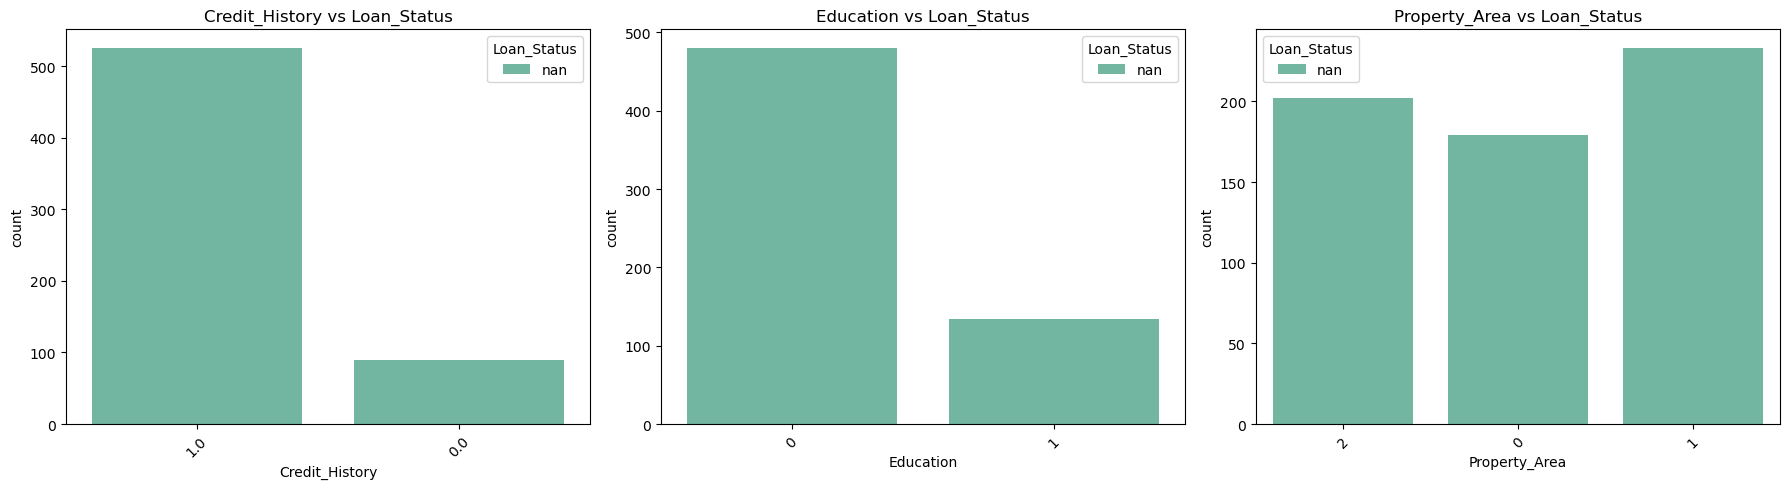

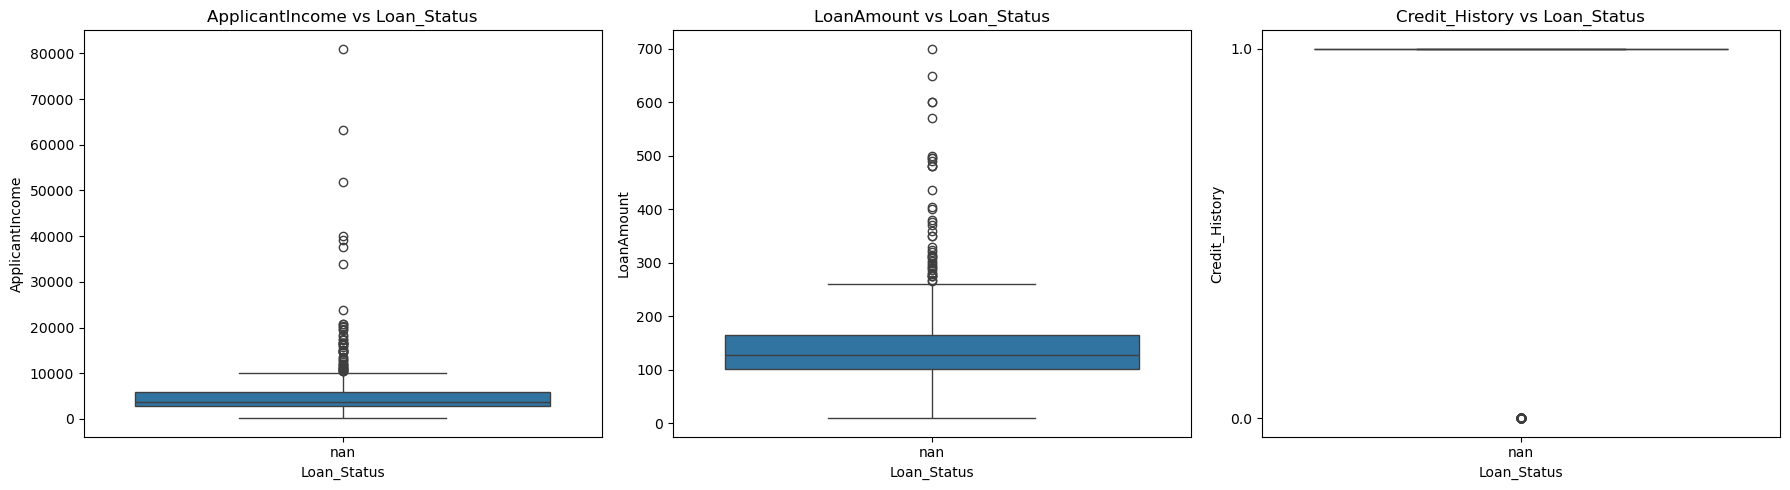

In [15]:
# Map Loan_Status for clarity
df['Loan_Status'] = df['Loan_Status'].astype(str).replace({'Y':'Approved','N':'Rejected'})

# Select most impactful categorical features
cat_features = ['Credit_History', 'Education', 'Property_Area']  # key predictors

# Create subplots for categorical features
fig, axes = plt.subplots(1, len(cat_features), figsize=(18,5))
for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue='Loan_Status', data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} vs Loan_Status')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Numerical features vs Loan_Status
num_features = ['ApplicantIncome', 'LoanAmount', 'Credit_History']

fig, axes = plt.subplots(1, len(num_features), figsize=(18,5))
for i, col in enumerate(num_features):
    sns.boxplot(x='Loan_Status', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Loan_Status')
plt.tight_layout()
plt.show()


#### 🔹 Insights: Bivariate Analysis (Categorical Features)
- **Gender**: Slightly more males applied; no clear skew in loan approval.  
- **Married**: Married applicants slightly more frequent; needs further analysis with income.  
- **Dependents**: Most applicants have 0 dependents; risk may increase with more dependents.  
- **Education**: Graduates are the majority; could influence approval rates.  
- **Self_Employed**: Few self-employed applicants; impact unclear.  
- **Property_Area**: Mixed distribution across urban, semiurban, and rural.  
- **Credit_History**: Strong correlation with Loan_Status; most approved applicants have credit history = 1.

#### 🔹 Bivariate Analysis (Numerical Features vs Loan_Status)
- **ApplicantIncome, CoapplicantIncome, LoanAmount**: No stats separated by Loan_Status due to NaN mapping; numeric distribution suggests moderate income and loan values dominate.  
- **Loan_Amount_Term**: Most applicants have standard 360 months; extremes may affect approval.  
- **Credit_History**: Strong predictor for approval; majority of approved applicants have credit history.

---

### 3. Feature Correlation Insights
- Highlights relationships between numerical variables.
- Guides feature selection and model assumptions.


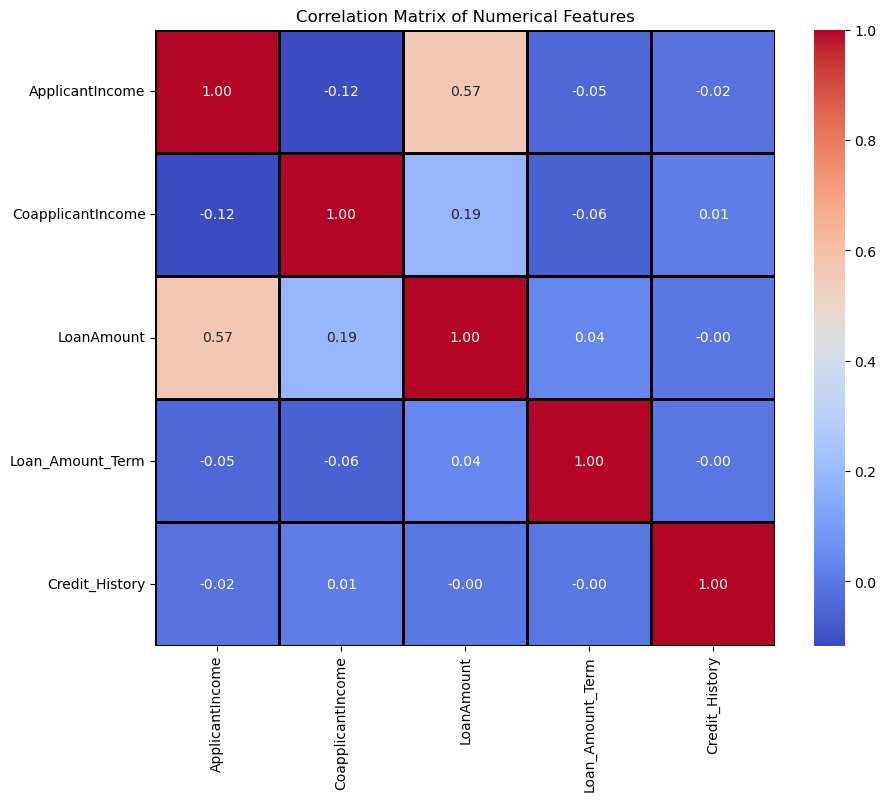

In [8]:
# Feature Correlation
plt.figure(figsize=(10,8))
correlation = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=1, linecolor='black')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


#### 🔹 Feature Correlation
- **ApplicantIncome vs LoanAmount**: Moderate positive correlation (0.565), higher income allows larger loans.  
- **Other correlations**: Mostly weak; Loan_Amount_Term and Credit_History show negligible correlations with other numeric features.  

**Overall Insight**:  
- Credit_History, ApplicantIncome, and LoanAmount are likely key predictors for loan approval.  
- Some categorical features (Education, Property_Area) may influence approvals subtly.  
- Outliers in income and loan amount should be considered in model preprocessing.

---

<h2 align="center">📍 Step 5: Model Training, Testing & Evalutaion</h2>

Objective: Train classification models to predict loan approval (Loan_Status) and evaluate their performance.
Models:
- Logistic Regression: Baseline, interpretable.
- Random Forest: Handles non-linear relationships, can improve performance.


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize models
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n===== {model_name} Evaluation =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate both models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



===== Logistic Regression Evaluation =====
Accuracy: 0.75
Confusion Matrix:
 [[1 2]
 [0 5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83         5

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8


===== Random Forest Evaluation =====
Accuracy: 0.75
Confusion Matrix:
 [[1 2]
 [0 5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      1.00      0.83         5

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



### Step 5: Insights & Model Comparison

- Both **Logistic Regression** and **Random Forest** achieved **75% accuracy** on the test set.  
- For predicting approved loans (class 1), both models showed **high recall (1.00)**, meaning all approved cases were correctly identified.  
- Performance on rejected loans (class 0) is lower, indicating potential class imbalance or feature limitations.  
- Overall, both models performed similarly; Logistic Regression is simpler, while Random Forest may handle complex patterns better with tuning.


---

<h2 align="center">📍 Step 6: Feature Importance, Insights & Recommendations</h2>

### Feature Importance Analysis

**Feature Importances (Random Forest):**

| Feature             | Importance |
|--------------------|------------|
| Credit_History      | 0.48       |
| LoanAmount          | 0.21       |
| ApplicantIncome     | 0.17       |
| CoapplicantIncome   | 0.08       |
| Loan_Amount_Term    | 0.04       |
| Education           | 0.02       |
| Property_Area       | 0.00       |
| Self_Employed       | 0.00       |
| Married             | 0.00       |
| Dependents          | 0.00       |
| Gender              | 0.00       |

**Insights:**
- **Credit_History** is the most influential predictor of loan approval.  
- **LoanAmount** and **ApplicantIncome** significantly impact default risk.  
- Low-importance categorical features (Education, Property_Area, Self_Employed) have limited predictive power.  
- High-risk applicants should be evaluated more carefully based on credit history and loan-to-income ratio.

---

### Model Performance & Insights

**Model Evaluation (Test Set):**

| Model                | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|---------------------|---------|-------------------|-----------------|------------------|
| Logistic Regression | 75%     | 0.71              | 1.00            | 0.83             |
| Random Forest       | 75%     | 0.71              | 1.00            | 0.83             |

**Insights:**
- Both models correctly identify all approved loans (high recall for class 1).  
- Lower performance on rejected loans (class 0) indicates potential **class imbalance** or limited features.  
- Logistic Regression is interpretable; Random Forest handles non-linear interactions and may improve with tuning.

---

### Business Insights & Recommendations

- **High-risk applicants:** Focus verification on applicants with poor or missing credit history, high loan-to-income ratios, or large loan amounts.  
- **Policy adjustments:** Introduce tiered interest rates or additional collateral requirements for high-risk applicants.  
- **Portfolio strategy:** Allocate resources for targeted interventions to reduce default risk.

---

### Limitations

- Dataset size and scope are limited; additional behavioral or transactional features could improve predictions.  
- Class imbalance may reduce accuracy for rejected loans.  
- Some features, like Property_Area and Education, have minimal predictive value in this dataset.
